In [ ]:
import torch
from torch import nn # nn containts basic building blocks for neural networks
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'1.13.1+cu116'

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step). unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

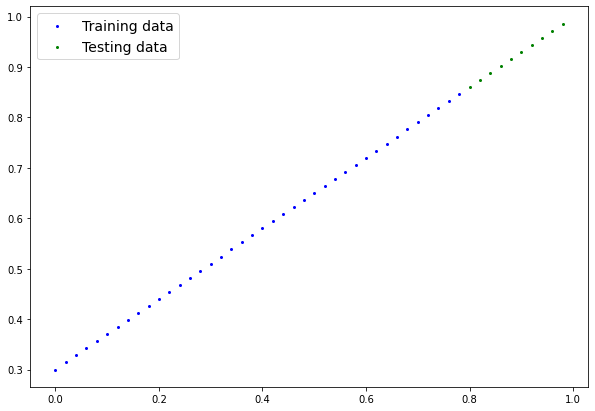

In [ ]:
plot_predictions()

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                                requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                            requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create a instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checkout the Parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Making predictions using torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

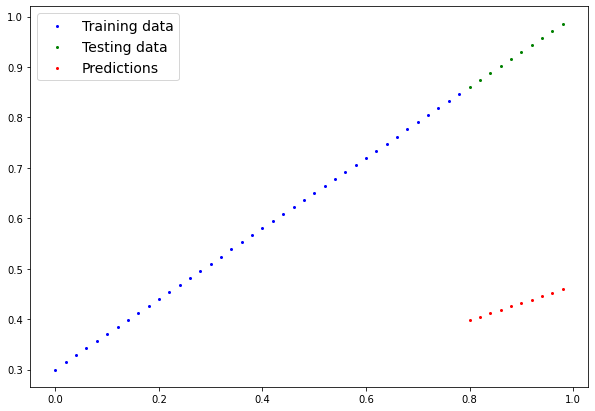

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Setup a loss function
loss_fn=nn.L1Loss()

# Setup an optimizer 
optimizer = torch.optim.SGD(
                            params=model_0.parameters(), 
                            lr=0.001 # the smaller the lr, the smaller the change in the parameters, the larger the lr, the bigger the change in the parameters
                            )

In [ ]:
# An epoch is one loop through data... (this is hyperparameter because we set it ourselves)
epochs = 4000

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range(epochs):

  model_0.train() # train mode in PyTorch sets all parameters that require gradients 

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer 
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above step 3 for the iteration of the loop

  ### Testing
  model_0.eval() # turn off gradient tracking
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass 
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

    # Print out what's happenin'    
    if epoch % (epochs//10) == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")    
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

print(f"Epoch: {epochs} | Loss: {loss} | Test loss: {test_loss}") 

Epoch: 1 | Loss: 0.3117292523384094 | Test loss: 0.4918419420719147
Epoch: 2 | Loss: 0.3105771541595459 | Test loss: 0.49049490690231323
Epoch: 3 | Loss: 0.3094250559806824 | Test loss: 0.48914775252342224
Epoch: 4 | Loss: 0.30827295780181885 | Test loss: 0.4878006875514984
Epoch: 5 | Loss: 0.3071208596229553 | Test loss: 0.4864535331726074
Epoch: 6 | Loss: 0.3059687614440918 | Test loss: 0.4851064682006836
Epoch: 7 | Loss: 0.3048166334629059 | Test loss: 0.48375946283340454
Epoch: 8 | Loss: 0.30366456508636475 | Test loss: 0.48241233825683594
Epoch: 9 | Loss: 0.3025124669075012 | Test loss: 0.48106521368026733
Epoch: 10 | Loss: 0.3013603389263153 | Test loss: 0.4797181189060211
Epoch: 11 | Loss: 0.30020827054977417 | Test loss: 0.4783710837364197
Epoch: 12 | Loss: 0.29905614256858826 | Test loss: 0.4770239293575287
Epoch: 13 | Loss: 0.2979040741920471 | Test loss: 0.47567683458328247
Epoch: 14 | Loss: 0.2967519462108612 | Test loss: 0.47432971000671387
Epoch: 15 | Loss: 0.295599877834

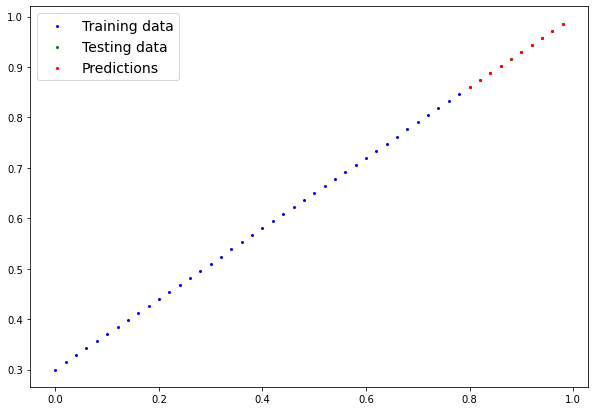

In [ ]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    plot_predictions(predictions=y_preds)

In [ ]:
import numpy as np
loss = np.array(torch.tensor(loss_values).numpy())
epoch = np.array(torch.tensor(epoch_count).numpy())
test_loss = np.array(torch.tensor(test_loss).numpy())

<ipython-input-17-9b653285bc79>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = np.array(torch.tensor(test_loss).numpy())


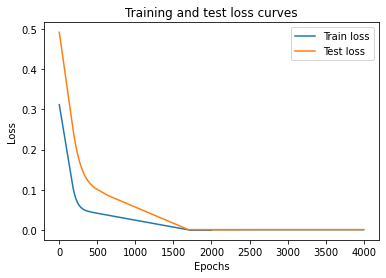

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Practicing writing training loops
#s = 1000

#for epoch in range(epochs):
#  y_pred = model_0(X_train)
#  loss = loss_fn(y_pred, X_train)
#  optimizer.zero_grad()
#  loss.backward()
#  optimizer.step()
#  if epoch % 10 == 0:
#    print(loss)

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create mode save path
MODEL_NAME = "LinearRegression_model3.pth" #  @param
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/LinearRegression_model3.pth


tensor(0.0008, grad_fn=<MeanBackward0>)


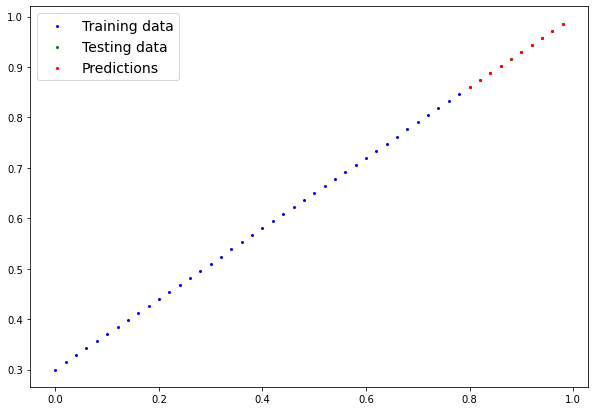

In [ ]:
loaded_model = LinearRegressionModel() # Set model type
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # Load the model
loaded_model.eval() # Set model to evaluation mode
loaded_model_y_preds = loaded_model(X_test) # Use the model on the testing data
with torch.inference_mode(): 
    loaded_model_y_preds = loaded_model(X_test)
    plot_predictions(predictions=loaded_model_y_preds)
# 1. Do the forward pass
test_preds = model_0(X_test)

# 2. Calculate the loss
test_loss = loss_fn(test_preds, y_test)
print(test_loss)

In [ ]:
# Compare loaded model preds with orignal preds
loaded_model_y_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  loaded_model_y_preds = model_0(X_test)

loaded_model_y_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

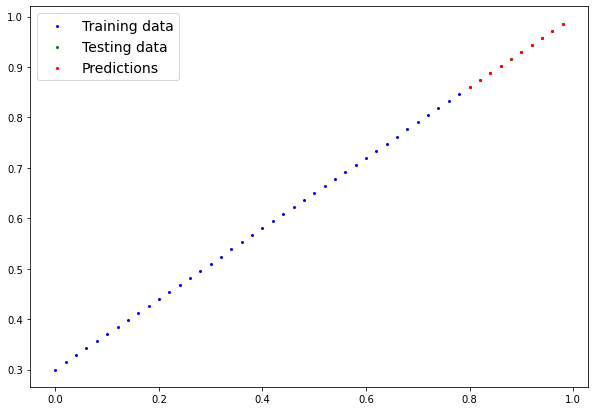

In [ ]:
with torch.inference_mode():
  plot_predictions(predictions=loaded_model_y_preds)